In [24]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'C:\Users\joel\Documents\Notebooks\.ipynb_checkpoints\breast cancer detection\data.csv')
print (df.shape)
df.head(8)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN


In [25]:
# the ratio of people having brain tumor 'M' vs the one's who don't 'B'
dont = df['diagnosis'].value_counts()[0]
do = df['diagnosis'].value_counts()[1]
print ('baseline accuracy for predicting positive/percentage : ',round((do/df.shape[0])*100,2),' %')
print ('baseline accuracy for predicting negative/percentage : ',round((dont/df.shape[0])*100,2),' %')

baseline accuracy for predicting positive/percentage :  37.26  %
baseline accuracy for predicting negative/percentage :  62.74  %


In [26]:
# checking for missing values
(df.isnull().sum()/df.shape[0])*100
# no missing values

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

In [27]:
len(df['id'].unique()) # shows every observation belongs to a different person and this variable could be treated as an index
df['Unnamed: 32'].unique() # nothing but null values
df.drop(['Unnamed: 32','id'],axis=1,inplace=True) # removed this variable

In [28]:
# convert the target 'diagnosis' variable into numeric categorical
df['diagnosis'] = pd.Categorical(df['diagnosis'])
df['diagnosis'] = df['diagnosis'].cat.codes
df['diagnosis'] = df['diagnosis'].astype('object')
df['diagnosis'].unique()

array([1, 0], dtype=object)

In [29]:
# we need to perform an outlier-removal, 
for i in df.columns[1:]:
    print ('Outlier removal for: ',i)
    q25,q75 = np.percentile(df[i],[25,75])
    iqr = q75 - q25
    maximum = q75 + (iqr*1.5)
    minimum = q25 - (iqr*1.5)
    df.loc[df[i]>maximum,i]=np.NaN
    df.loc[df[i]<minimum,i]= np.NaN

# again perform a missing value analysis to see if there were outliers removed or not
(df.isnull().sum()/df.shape[0])*100

Outlier removal for:  radius_mean
Outlier removal for:  texture_mean
Outlier removal for:  perimeter_mean
Outlier removal for:  area_mean
Outlier removal for:  smoothness_mean
Outlier removal for:  compactness_mean
Outlier removal for:  concavity_mean
Outlier removal for:  concave points_mean
Outlier removal for:  symmetry_mean
Outlier removal for:  fractal_dimension_mean
Outlier removal for:  radius_se
Outlier removal for:  texture_se
Outlier removal for:  perimeter_se
Outlier removal for:  area_se
Outlier removal for:  smoothness_se
Outlier removal for:  compactness_se
Outlier removal for:  concavity_se
Outlier removal for:  concave points_se
Outlier removal for:  symmetry_se
Outlier removal for:  fractal_dimension_se
Outlier removal for:  radius_worst
Outlier removal for:  texture_worst
Outlier removal for:  perimeter_worst
Outlier removal for:  area_worst
Outlier removal for:  smoothness_worst
Outlier removal for:  compactness_worst
Outlier removal for:  concavity_worst
Outlier rem

diagnosis                   0.000000
radius_mean                 2.460457
texture_mean                1.230228
perimeter_mean              2.284710
area_mean                   4.393673
smoothness_mean             1.054482
compactness_mean            2.811951
concavity_mean              3.163445
concave points_mean         1.757469
symmetry_mean               2.636204
fractal_dimension_mean      2.636204
radius_se                   6.678383
texture_se                  3.514938
perimeter_se                6.678383
area_se                    11.423550
smoothness_se               5.272408
compactness_se              4.920914
concavity_se                3.866432
concave points_se           3.339192
symmetry_se                 4.745167
fractal_dimension_se        4.920914
radius_worst                2.987698
texture_worst               0.878735
perimeter_worst             2.636204
area_worst                  6.151142
smoothness_worst            1.230228
compactness_worst           2.811951
c

In [30]:
# because the percentage of missing values is less than 30%, we can impute those values rather than deleting those observations
# because the dataset is small we could apply KNN imputation method for filling the missing values' created after outlier removal

from missingpy import KNNImputer # imputer library for python 3.5.2
# Doing KNN-imputation over the dataframe
df = pd.DataFrame(KNNImputer(n_neighbors=2, weights="uniform").fit_transform(df), columns = df.columns)
print ((df.isnull().sum()/df.shape[0])*100)

diagnosis                  0.0
radius_mean                0.0
texture_mean               0.0
perimeter_mean             0.0
area_mean                  0.0
smoothness_mean            0.0
compactness_mean           0.0
concavity_mean             0.0
concave points_mean        0.0
symmetry_mean              0.0
fractal_dimension_mean     0.0
radius_se                  0.0
texture_se                 0.0
perimeter_se               0.0
area_se                    0.0
smoothness_se              0.0
compactness_se             0.0
concavity_se               0.0
concave points_se          0.0
symmetry_se                0.0
fractal_dimension_se       0.0
radius_worst               0.0
texture_worst              0.0
perimeter_worst            0.0
area_worst                 0.0
smoothness_worst           0.0
compactness_worst          0.0
concavity_worst            0.0
concave points_worst       0.0
symmetry_worst             0.0
fractal_dimension_worst    0.0
dtype: float64


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\missingpy\knnimpute.py:224: UserWarning: There are rows with more than 50.0% missing values. These rows are not included as donor neighbors.
  .format(self.row_max_missing * 100))
C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\missingpy\knnimpute.py:282: UserWarning: There are rows with more than 50.0% missing values. The missing features in these rows are imputed with column means.
  .format(self.row_max_missing * 100))
C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\missingpy\utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


In [31]:
# let's check which variables are normalized already(between 0 and 1) and which ones aren't
# let's save their names in a list
not_normal=[]
for i in df.columns[1:]:
    up,down = max(df[i]),min(df[i])
    if up<=1 and down>=0:
        print (i,' is normal: ',(up,down))
    else:
        print (i,' is not normal: ',(up,down))
        not_normal.append(i)
    print ('\n')    
        
print (not_normal)        

radius_mean  is not normal:  (21.75, 6.981)


texture_mean  is not normal:  (29.97, 9.71)


perimeter_mean  is not normal:  (147.3, 43.79)


area_mean  is not normal:  (1326.0, 143.5)


smoothness_mean  is normal:  (0.1335, 0.06251)


compactness_mean  is normal:  (0.2284, 0.01938)


concavity_mean  is normal:  (0.281, 0.0)


concave points_mean  is normal:  (0.152, 0.0)


symmetry_mean  is normal:  (0.2459, 0.1167)


fractal_dimension_mean  is normal:  (0.07871, 0.049960000000000004)


radius_se  is normal:  (0.8426, 0.1115)


texture_se  is not normal:  (2.426, 0.3602)


perimeter_se  is not normal:  (5.865, 0.757)


area_se  is not normal:  (83.5, 6.8020000000000005)


smoothness_se  is normal:  (0.01243, 0.001713)


compactness_se  is normal:  (0.060629999999999996, 0.002252)


concavity_se  is normal:  (0.08232, 0.0)


concave points_se  is normal:  (0.025269999999999997, 0.0)


symmetry_se  is normal:  (0.035460000000000005, 0.007882)


fractal_dimension_se  is normal:  (0.008015

In [32]:
# let's normalize those variables before performing any kind on analysis on them
for i in not_normal:
    df[i] = (df[i]-min(df[i]))/(max(df[i])-min(df[i]))
    
df.head(10) # have a look at the normalized dataframe    


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.745413,0.033070,0.763308,0.725159,0.11840,0.13955,0.15215,0.14710,0.2419,...,0.899948,0.178009,0.983870,0.874986,0.16220,0.37265,0.7119,0.2654,0.26690,0.118900
1,1.0,0.920103,0.397828,0.860883,1.000000,0.08474,0.07864,0.08690,0.07017,0.1812,...,0.879835,0.381830,0.794706,0.915036,0.12380,0.18660,0.2416,0.1860,0.27500,0.089020
2,1.0,0.860519,0.569595,0.832866,0.895983,0.10960,0.15990,0.19740,0.12790,0.2069,...,0.806601,0.452900,0.748515,0.871839,0.14440,0.42450,0.4504,0.2430,0.36130,0.087580
3,1.0,0.300562,0.526654,0.326442,0.205159,0.09821,0.16905,0.24140,0.10520,0.1748,...,0.359979,0.485417,0.355305,0.218847,0.12705,0.39065,0.6869,0.2575,0.30325,0.084740
4,1.0,0.901144,0.228529,0.882137,0.975476,0.10030,0.13280,0.19800,0.10430,0.1809,...,0.753481,0.155883,0.746316,0.795171,0.13740,0.20500,0.4000,0.1625,0.23640,0.076780
5,1.0,0.370303,0.295656,0.374650,0.282114,0.12780,0.17000,0.15780,0.08089,0.2087,...,0.388860,0.393228,0.388518,0.318343,0.17910,0.52490,0.5355,0.1741,0.39850,0.080460
6,1.0,0.763017,0.506910,0.732393,0.758140,0.09463,0.10900,0.11270,0.07400,0.1794,...,0.771016,0.524304,0.753648,0.812908,0.14420,0.25760,0.3784,0.1932,0.30630,0.083680
7,1.0,0.455616,0.548865,0.448362,0.367357,0.11890,0.16450,0.09366,0.05985,0.2196,...,0.470861,0.540396,0.441308,0.407255,0.16540,0.36820,0.2678,0.1556,0.31960,0.115100
8,1.0,0.407543,0.597730,0.422278,0.318224,0.12730,0.19320,0.18590,0.09353,0.2350,...,0.389892,0.627221,0.409048,0.317027,0.17030,0.54010,0.5390,0.2060,0.28750,0.107200
9,1.0,0.370980,0.707305,0.388175,0.281099,0.11860,0.17980,0.22730,0.08543,0.2030,...,0.369263,0.960778,0.346360,0.301064,0.18530,0.51010,0.6148,0.2210,0.27290,0.095935


In [33]:
# let's perform ANOVA (analysis of Variance) test between the categorical-target and the independent numeric variables

unrelated =[]#  list of variables  not-related to the target

from scipy import stats
for i in df.columns[1:]:
    fStat, pVal = stats.f_oneway(df['diagnosis'], df[i])
    print(i,' P-value: ',pVal,' f-statistic: ',fStat)
    if pVal<0.05:
        print ('There is a relationship between col: ',i,' and the target variable')
    else:
        print ('No relationship between col: ',i,' and the target variable')
        unrelated.append(i)
    print ('\n')    
        
print (unrelated)              

radius_mean  P-value:  8.532409732652838e-06  f-statistic:  19.99737873495702
There is a relationship between col:  radius_mean  and the target variable


texture_mean  P-value:  1.674580463157185e-05  f-statistic:  18.687834313709555
There is a relationship between col:  texture_mean  and the target variable


perimeter_mean  P-value:  0.00026432554670146295  f-statistic:  13.391822405827408
There is a relationship between col:  perimeter_mean  and the target variable


area_mean  P-value:  0.09966563801655207  f-statistic:  2.7153189422657737
No relationship between col:  area_mean  and the target variable


smoothness_mean  P-value:  2.9444365401327244e-39  f-statistic:  185.59565166031166
There is a relationship between col:  smoothness_mean  and the target variable


compactness_mean  P-value:  1.0701750407287684e-37  f-statistic:  177.30682048127366
There is a relationship between col:  compactness_mean  and the target variable


concavity_mean  P-value:  9.21697388432503e-42  f-

C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


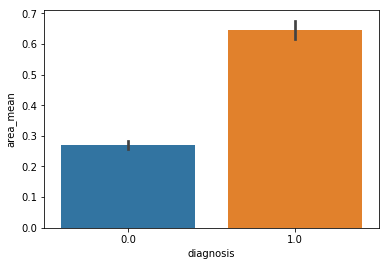

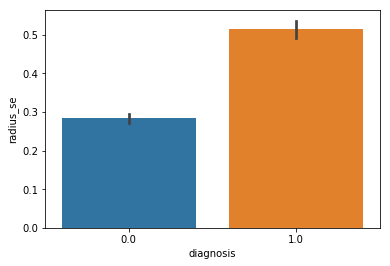

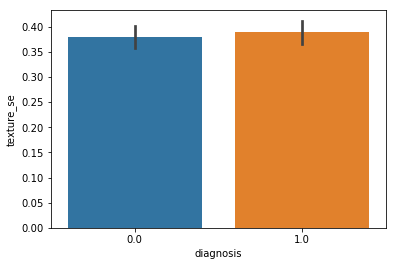

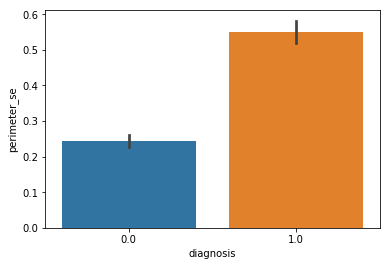

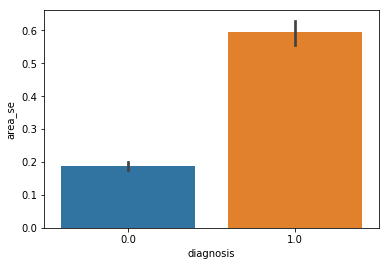

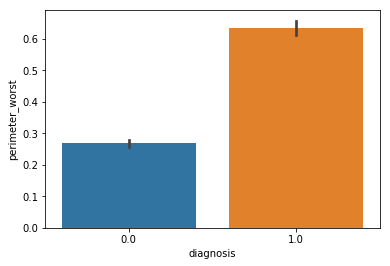

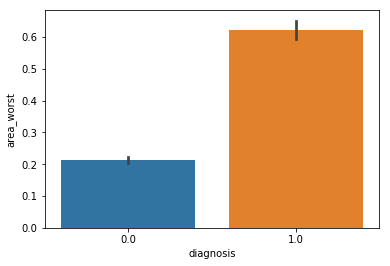

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [34]:
# before removing those unrelated variables let's visualize if they actually have something to contribute
# w.r.t their mean and the individual class of the target
from matplotlib import pyplot as plt
import seaborn as sns  #Seaborn is another powerful visualization library for Python sns.set(style="whitegrid")
#Create the bar plot for Average Sales across different Seasons
for y in unrelated:
    ax = sns.barplot(x = 'diagnosis',y=y, data=df,estimator=np.mean)
    plt.show()
    
# the visualization does shows some difference between the average values of the independent w.r.t target
# but we dont know how much does this difference helps to evaluate or explain the variance for the classification of the 
# binary target variable, like the difference between the average of both the binary- target classes range between 0.25 to 0.15
# maybe this difference would have been more if the variables weren't normalized for visualization but for now
# trusting in the ANOVA test, we would go forward with removing those unrelated variables
df.drop(labels=unrelated, axis=1, inplace=True)
df.columns # remaining variables 

In [35]:
# let's perform a correlation test checking for multicollinearity between the independent continuous variables themselves
numeric = list(df.columns[1:])
df[numeric].corr()

# the correlations, too many apparently!
# have selected only those with collinearity above 70%
# we'll need a method to selectively highlight those needed to be removed by choosing the most common ones 
# and enough left in the end for developing models.



,radius_mean,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,...,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.318541,0.997456,0.140160,0.469730,0.650687,0.782994,0.138148,-0.285451,-0.207227,...,-0.254729,0.021588,0.963810,0.287652,0.127142,0.438669,0.552150,0.712648,0.162829,0.048331
texture_mean,0.318541,1.000000,0.327528,0.003335,0.238784,0.332412,0.300478,0.111800,-0.047650,0.076778,...,-0.015484,0.146044,0.342444,0.901716,0.084532,0.260795,0.311299,0.294001,0.077168,0.101961
perimeter_mean,0.997456,0.327528,1.000000,0.178475,0.521262,0.692329,0.815985,0.170015,-0.239176,-0.186493,...,-0.241948,0.063903,0.965345,0.296291,0.158691,0.485114,0.592242,0.744489,0.182200,0.094308
smoothness_mean,0.140160,0.003335,0.178475,1.000000,0.632141,0.496329,0.540631,0.507476,0.536047,0.291966,...,0.101584,0.378868,0.199466,0.063838,0.768457,0.456526,0.411012,0.497062,0.356084,0.452690
compactness_mean,0.469730,0.238784,0.521262,0.632141,1.000000,0.877572,0.812053,0.530204,0.445907,0.137097,...,0.024836,0.553022,0.515382,0.235742,0.525646,0.859090,0.809874,0.804581,0.387776,0.629137
concavity_mean,0.650687,0.332412,0.692329,0.496329,0.877572,1.000000,0.921187,0.439187,0.229815,0.120633,...,-0.042083,0.444131,0.682702,0.325760,0.453504,0.792098,0.894271,0.873672,0.332169,0.491891
concave points_mean,0.782994,0.300478,0.815985,0.540631,0.812053,0.921187,1.000000,0.422966,0.141840,0.054056,...,-0.070476,0.346708,0.808016,0.294327,0.452934,0.696132,0.780264,0.904025,0.327501,0.386694
symmetry_mean,0.138148,0.111800,0.170015,0.507476,0.530204,0.439187,0.422966,1.000000,0.367570,0.161600,...,0.257177,0.345722,0.189219,0.136194,0.402349,0.428377,0.399293,0.387742,0.605809,0.364590
fractal_dimension_mean,-0.285451,-0.047650,-0.239176,0.536047,0.445907,0.229815,0.141840,0.367570,1.000000,0.268971,...,0.207519,0.597109,-0.210865,-0.019651,0.480710,0.380796,0.245125,0.140239,0.236018,0.660111
smoothness_se,-0.207227,0.076778,-0.186493,0.291966,0.137097,0.120633,0.054056,0.161600,0.268971,1.000000,...,0.354018,0.367837,-0.189001,0.017694,0.314150,0.014054,0.012494,-0.010237,-0.066019,0.114860


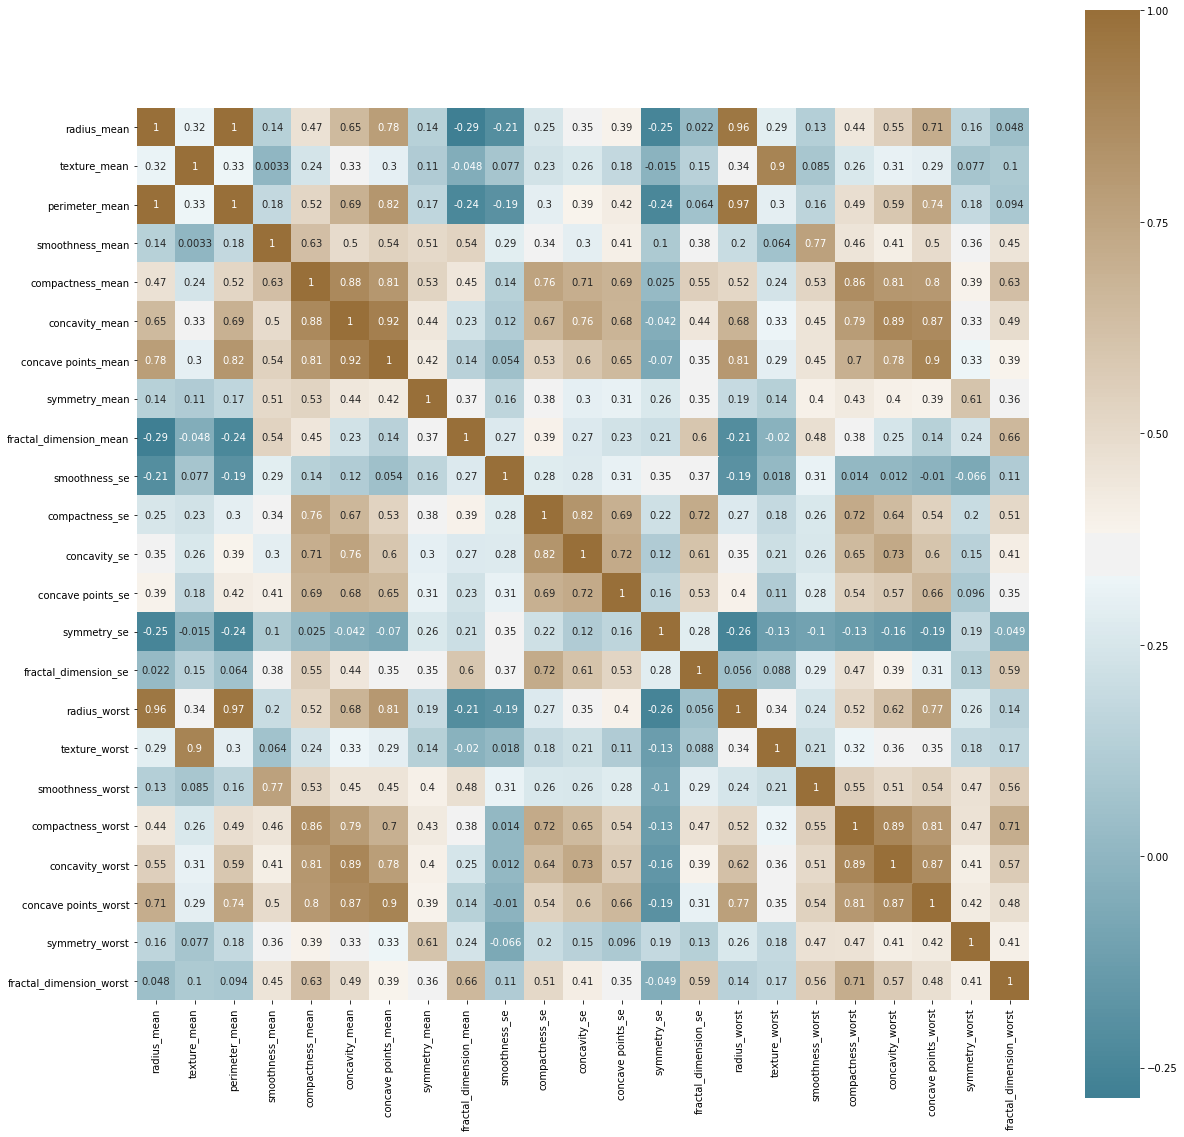

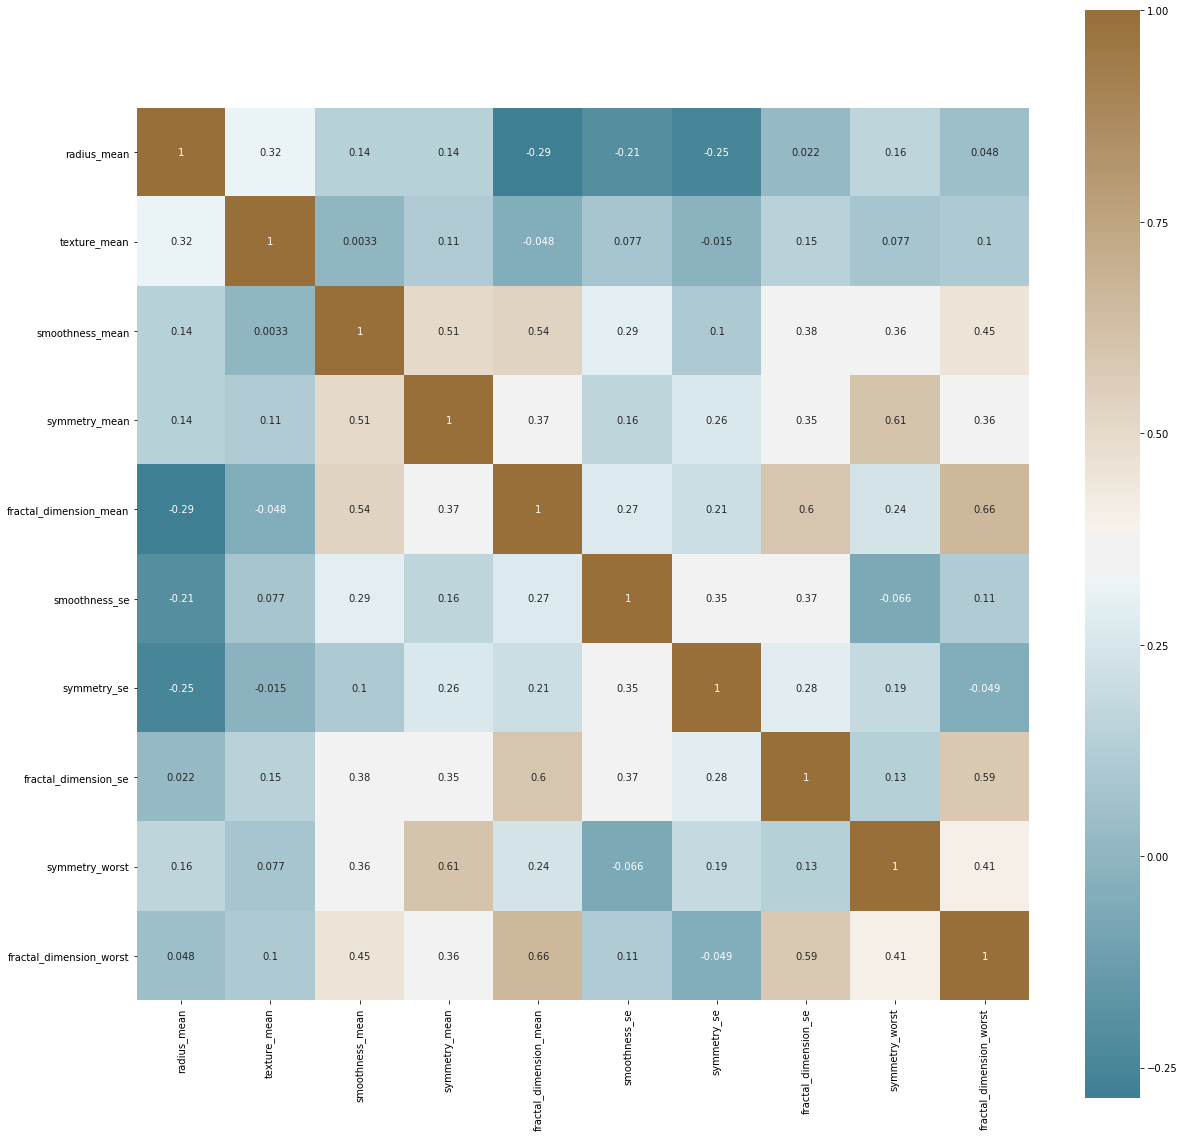

In [36]:
corr = df[numeric].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax,annot = True)
plt.show()

# let's make a heatmap and then look at both the heatmap and the correlations to remove only the extra collinear variables
# we'll work by keeping the diagonal variables in the heatmap and removing the highly correlated variables(>70%) with them
# perimeter_mean, radius_worst,concave points_worst, concave points_mean ~ radius_mean
# texture_worst ~ texture_mean
# smoothness_worst ~ smoothness_mean 
# compactness_se, concavity_se, concave points_se, compactness_worst,concavity_worst,concavity_mean ~ compactness_mean
# above are the selected most common collinearities
collinears = ['perimeter_mean', 'radius_worst','concave points_worst','texture_worst','smoothness_worst',
              'compactness_se', 'concavity_se', 'concave points_se', 'compactness_worst','concavity_worst',
              'concavity_mean','concave points_mean', 'compactness_mean']
df.drop(labels = collinears, axis=1, inplace=True)

# let's do the heatmap again to check for multicollinearity ( if any variables we didn't notice)
numeric = df.columns[1:]
corr = df[numeric].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax,annot = True)
plt.show()
# all multicollinear variables removed

In [37]:
print (df.shape)
df.head(10)

(569, 11)


,diagnosis,radius_mean,texture_mean,smoothness_mean,symmetry_mean,fractal_dimension_mean,smoothness_se,symmetry_se,fractal_dimension_se,symmetry_worst,fractal_dimension_worst
0,1.0,0.745413,0.033070,0.11840,0.2419,0.078710,0.006399,0.03003,0.006193,0.26690,0.118900
1,1.0,0.920103,0.397828,0.08474,0.1812,0.056670,0.005225,0.01389,0.003532,0.27500,0.089020
2,1.0,0.860519,0.569595,0.10960,0.2069,0.059990,0.006150,0.02250,0.004571,0.36130,0.087580
3,1.0,0.300562,0.526654,0.09821,0.1748,0.061115,0.009110,0.02040,0.003829,0.30325,0.084740
4,1.0,0.901144,0.228529,0.10030,0.1809,0.058830,0.011490,0.01756,0.005115,0.23640,0.076780
5,1.0,0.370303,0.295656,0.12780,0.2087,0.076130,0.007510,0.02165,0.005082,0.39850,0.080460
6,1.0,0.763017,0.506910,0.09463,0.1794,0.057420,0.004314,0.01369,0.002179,0.30630,0.083680
7,1.0,0.455616,0.548865,0.11890,0.2196,0.074510,0.008805,0.01486,0.005412,0.31960,0.115100
8,1.0,0.407543,0.597730,0.12730,0.2350,0.073890,0.005731,0.02143,0.003749,0.28750,0.107200
9,1.0,0.370980,0.707305,0.11860,0.2030,0.065455,0.007149,0.01789,0.004473,0.27290,0.095935


[0.38068808 0.15572996 0.08496408 0.05921024 0.05077982 0.03940085
 0.04868709 0.04049809 0.05940747 0.08063431]


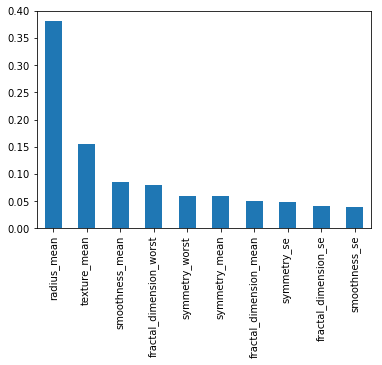

In [38]:
# Let's perform a feature importance test
# this test gives you a score for each feature of your data, the higher score shows more importance/relevance 
# of that feature towards your target variable
# it uses a tree-based classifiers approach

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

X = df[numeric]
y = df['diagnosis']
importances = ExtraTreesClassifier().fit(X,y)
print (importances.feature_importances_)

# Let's look at the scores visually

values = pd.Series(importances.feature_importances_, index = numeric)
values.nlargest(10).plot(kind='bar')
plt.figsize=(10,15)
plt.show()

# radius_mean shows the highest relevance to the target, much more so compared to the rest of the variables
# with text_mean, smoothness_mean and others so on in a decreasing manner, but looking at the horizontal scales and after doing an ANOVA analysis
# we shouldn't be removing any variable YET, because all of them more or less show some relationship to the target in ANOVA.
# we will decide after doing some further tests which ones to removing also considering the importance-values received from
# this test.

In [39]:
# source: https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
from sklearn.linear_model import Lasso, LogisticRegression # Lasso is L1 regularization
from sklearn.feature_selection import SelectFromModel

# fitting the feature selection model with the Logistic regression data
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))

sel_.fit(df.iloc[:,:-1], df['diagnosis'])
#sel_.fit(df[numeric], df['Class'])

# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())

#  So True is for the features that lasso thought is important (non-zero features) 
# while False is for the features whose weights were shrinked to zero and are not important according to Lasso.


selected_feat = df[numeric].columns[(sel_.get_support())] # gives the remaining features

print (selected_feat)
# looks like the sklearn's feature importance did show something similar to what the lasso applied logistic regression model
# is showing
# here, only 'radius_mean' is showed as the only necessary variable for predicting the target
# what we'll do is we will create another dataframe df2 with only two variables 'radius_mean' and 'texture_mean' 
# (for safety from underfitting) and we'll apply some models to see if they are giving better accuracy and small FNR
# and therefore actually reducing some overfitting

[ True False False False False False False False False False]
Index(['radius_mean'], dtype='object')


In [61]:
numeric2= ['radius_mean','texture_mean','smoothness_mean']
df2 = df[numeric2]
df2.head(4)

,radius_mean,texture_mean,smoothness_mean
0,0.745413,0.033070,0.11840
1,0.920103,0.397828,0.08474
2,0.860519,0.569595,0.10960
3,0.300562,0.526654,0.09821


In [62]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, Y_train, Y_test = train_test_split(df[numeric],df['diagnosis'],test_size=0.33,random_state=42)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(df2[numeric2], df['diagnosis'], test_size=0.33, random_state=42)
                                                        # df2 lasso split

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

print (X_train2.shape, Y_train2.shape)
print (X_test2.shape, Y_test2.shape)

def error_metric(y_true,y_preds):
    CM = pd.crosstab(y_true,y_preds) # the confusion matrix
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    print ('accuracy score: ',accuracy_score(y_true, y_preds)*100,'%') #check accuracy of model
    print ('False-Negative-Rate: ',(FN*100)/(FN+TP),'%') #False Negative rate 
    print ('true-positive-rate: ',((TP+TN)*100)/(TP+TN+FP+FN),'%')

(381, 10) (381,)
(188, 10) (188,)
(381, 3) (381,)
(188, 3) (188,)


In [63]:
# applying logistic-regression
from sklearn.linear_model import LogisticRegression

# OLS is the method which helps to calculate the co-efficients: b0, b1, b2, b3 and so on.
model = LogisticRegression().fit(X_train, Y_train) 
LR_preds = model.predict(X_test)
print (error_metric(Y_test,(LR_preds)))


# the lasso feature selection model
model2 = LogisticRegression().fit(X_train2, Y_train2) 
LR_preds2 = model2.predict(X_test2)
print (error_metric(Y_test2,(LR_preds2)))
# understanding the summary via the below source site
# https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate

accuracy score:  89.8936170212766 %
False-Negative-Rate:  20.895522388059703 %
true-positive-rate:  89.8936170212766 %
None
accuracy score:  89.36170212765957 %
False-Negative-Rate:  22.388059701492537 %
true-positive-rate:  89.36170212765957 %
None


In [64]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion='entropy',max_depth=8).fit(X_train,Y_train)
DT_preds = DT_model.predict(X_test)
error_metric(Y_test,DT_preds)

DT_model2 = DecisionTreeClassifier(criterion='entropy',max_depth=8).fit(X_train2,Y_train2)
DT_preds2 = DT_model2.predict(X_test2)
error_metric(Y_test2,DT_preds2)

accuracy score:  88.82978723404256 %
False-Negative-Rate:  8.955223880597014 %
true-positive-rate:  88.82978723404256 %
accuracy score:  88.29787234042553 %
False-Negative-Rate:  5.970149253731344 %
true-positive-rate:  88.29787234042553 %


In [68]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=30).fit(X_train,Y_train)
RF_preds = RF_model.predict(X_test)
error_metric(Y_test,RF_preds)

RF_model2 = RandomForestClassifier(n_estimators=30).fit(X_train2,Y_train2)
RF_preds2 = RF_model2.predict(X_test2)
error_metric(Y_test2,RF_preds2)

accuracy score:  94.14893617021278 %
False-Negative-Rate:  8.955223880597014 %
true-positive-rate:  94.14893617021276 %
accuracy score:  94.68085106382979 %
False-Negative-Rate:  7.462686567164179 %
true-positive-rate:  94.68085106382979 %


In [71]:
from sklearn.neighbors import KNeighborsClassifier
K_model = KNeighborsClassifier().fit(X_train,Y_train)
K_preds = K_model.predict(X_test)
error_metric(Y_test,K_preds)

K_model2 = KNeighborsClassifier().fit(X_train2,Y_train2)
K_preds2 = K_model2.predict(X_test2)
error_metric(Y_test2,K_preds2)

accuracy score:  93.08510638297872 %
False-Negative-Rate:  11.940298507462687 %
true-positive-rate:  93.08510638297872 %
accuracy score:  88.29787234042553 %
False-Negative-Rate:  20.895522388059703 %
true-positive-rate:  88.29787234042553 %


In [72]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB().fit(X_train,Y_train)
NB_preds = NB_model.predict(X_test)
error_metric(Y_test,NB_preds)

NB_model2 = GaussianNB().fit(X_train2,Y_train2)
NB_preds2 = NB_model2.predict(X_test2)
error_metric(Y_test2,NB_preds2)

accuracy score:  94.14893617021278 %
False-Negative-Rate:  5.970149253731344 %
true-positive-rate:  94.14893617021276 %
accuracy score:  95.74468085106383 %
False-Negative-Rate:  7.462686567164179 %
true-positive-rate:  95.74468085106383 %


In [73]:
from sklearn.svm import SVC
SV_model = SVC(C=1.0).fit(X_train,Y_train)
SV_preds = SV_model.predict(X_test)

error_metric(Y_test,SV_preds)

SV_model2 = SVC(C=1.0).fit(X_train2,Y_train2)
SV_preds2 = SV_model2.predict(X_test2)

error_metric(Y_test2,SV_preds2)

accuracy score:  87.2340425531915 %
False-Negative-Rate:  29.850746268656717 %
true-positive-rate:  87.23404255319149 %
accuracy score:  88.82978723404256 %
False-Negative-Rate:  23.880597014925375 %
true-positive-rate:  88.82978723404256 %


In [81]:
# let's apply deep-learning using Keras
from keras import models
from keras import layers

# because the dataset is too small, we need to apply k-fold cross validation over this dataset
# because less dataset can cause more overfitting and creating a validation data out of such small dataset would only capture 
# small variance of the entire dataset and then checking the error metrics of the model over such validation data-
# -would not yield good results
# create a function that returns a model designed as per our feature and problem requirements
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(10,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) # because of multi-class labels
    # defining the optimizer and loss and accuracy parameters
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

ptrain_data ,x_val,ptrain_targets,y_val = train_test_split(X_train,Y_train,test_size=0.2,random_state=42)
print (ptrain_data.shape ,ptrain_targets.shape)
print (x_val.shape,y_val.shape)

(304, 10) (304,)
(77, 10) (77,)


In [196]:
k = 4
num_val_samples = len(X_train) // k
num_epochs = 30
all_scores = []
loss = np.array([0*num_epochs])
val_loss = np.array([0*num_epochs])

# creating a loop for seperating training and validation data for every fold and storing their respective loss and accuracy values
for i in range(k):
    print('processing fold #', i)
    xval = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    yval = Y_train[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate([X_train[:i * num_val_samples],X_train[(i + 1) * num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([Y_train[:i * num_val_samples],Y_train[(i + 1) * num_val_samples:]],axis=0)
    model = build_model()
    history =  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, validation_data =(xval,yval),verbose=0) # with batch=1 we are going 'sgd'
    # has values training and validation loss
    loss = np.add(loss,history.history['loss'])
    val_loss = np.add(val_loss,history.history['val_loss']) 
    results = model.evaluate(X_test, Y_test, verbose=0)
    all_scores.append(results) # results has values loss and accuracy
    
losses = [i[0] for i in all_scores]
acc = [i[1] for i in all_scores]

kpreds = model.predict(X_test)
kpreds = [round(i[0]) for i in kpreds]

#mean metrics of evaluating the k-fold model on test data 

print ('mean - test loss: ',np.mean(losses),'\n mean - test accuracy: ',np.mean(acc)) 
print (error_metric(Y_test,np.array(kpreds)))

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss/4, 'bo', label='mean Training loss')
plt.plot(epochs, val_loss/4, 'b', label='mean Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

 
# with 30 epochs and 'adam' optimizer    
# mean - test loss:  0.2026894950169198 
# mean - test accuracy:  0.9095744668169224
# accuracy score:  89.36170212765957 %
# False-Negative-Rate:  22.388059701492537 %
# true-positive-rate:  89.36170212765957 %   

# with optimizer='rmsprop' and 50 epochs
#mean - test loss:  0.22768621087858554 
# mean - test accuracy:  0.9315789432902086
#accuracy score:  94.14893617021278 %
#False-Negative-Rate:  5.970149253731344 %
#true-positive-rate:  92.02127659574468 %

# with optimizer='adam' and 50 epochs
#mean - test loss:  0.17946001840265174 
# mean - test accuracy:  0.934210522237577
#accuracy score:  91.48936170212765 %
#False-Negative-Rate:  4.477611940298507 %
#true-positive-rate:  91.48936170212765 %    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Train on 304 samples, validate on 77 samples
Epoch 1/30
304/304 [==============================] - 3s 10ms/step - loss: 0.6646 - acc: 0.6513 - val_loss: 0.5906 - val_acc: 0.8312

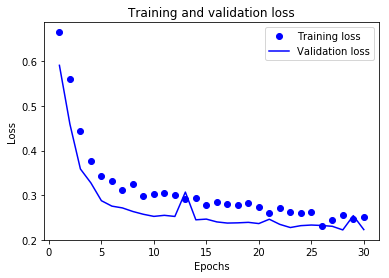

In [87]:
# testing how the individual model with sampe parameters scores on test data

model = build_model()
history = model.fit(ptrain_data,ptrain_targets,batch_size=1,epochs=30,validation_data=(x_val, y_val))

preds = model.predict(X_test)
test_results = model.evaluate(X_test,Y_test)
for i in range(len(test_results)):
    print (model.metrics_names[i],': ',test_results[i])

preds = [round(i[0]) for i in preds]
print (preds)

error_metric(Y_test,np.array(preds))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# with 50 epochs and 'rmsprop' optimizer
# loss :  0.18905380209709735
# acc :  0.9308510600252354
# accuracy score:  93.08510638297872 %
# False-Negative-Rate:  10.447761194029852 %
# true-positive-rate:  93.08510638297872 %

# with 40 epochs and 'rmsprop' optimizer
# loss :  0.19520155039239437
# acc :   0.9308510625616033
# accuracy score:  93.08510638297872 %
# False-Negative-Rate:  5.970149253731344 %
# true-positive-rate: 93.08510638297872 %


# with 30 epochs and 'rmsprop' optimizer
# loss :  0.17293454167690683
# acc :  0.9468085068337461
# accuracy score:  94.68085106382979 %
# False-Negative-Rate:  7.462686567164179 %
# true-positive-rate:  94.68085106382979 %

Train on 304 samples, validate on 77 samples
Epoch 1/15
304/304 [==============================] - 3s 9ms/step - loss: 0.6540 - acc: 0.6875 - val_loss: 0.5644 - val_acc: 0.8052

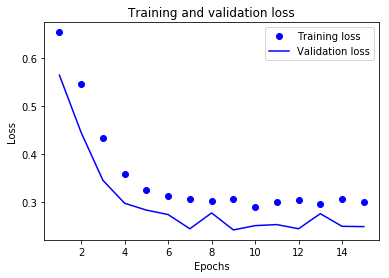

In [86]:
# let's train the neural network model over the lasso applied dataframe df2 with just 30 epochs and see the error metrics

# new model definition with input features 3
def build_model2():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(3,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid')) # because of multi-class labels
    # defining the optimizer and loss and accuracy parameters
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    return model

ptrain_data2,x_val2,ptrain_targets2,y_val2 = train_test_split(X_train2,Y_train2,test_size=0.2,random_state=42)
model2 = build_model2()
history = model2.fit(ptrain_data2,ptrain_targets2,batch_size=1,epochs=15,validation_data=(x_val2, y_val2))

preds2 = model2.predict(X_test2)
test_results = model2.evaluate(X_test2,Y_test2)
for i in range(len(test_results)):
    print (model2.metrics_names[i],': ',test_results[i])

preds2 = [round(i[0]) for i in preds2]
print (preds2)

error_metric(Y_test2,np.array(preds2))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# with only 3 features selected by applying lasso l2 features selected dataframe df2 and 30 epochs
# loss :  0.22493025597105634
# acc :  0.8989361689445821
    
# accuracy score:  89.8936170212766 %
# False-Negative-Rate:  14.925373134328359 %
# true-positive-rate:  89.8936170212766 %    

# with only 3 features selected by applying lasso l2 features selected dataframe df2 and 15 epochs

In [ ]:
# let's compare the different models


                           df2 (DNN)             df (DNN)
loss :                0.22493025597105634    0.20751425497075346
accuracy score:       89.8936170212766 %     91.48936170212765 %
False-Negative-Rate:  14.925373134328359 %   7.462686567164179 %
# in deep-learning, the model with lasso applied feature selection fared better with less FNR and more accuracy-score    
 

# # machine learning models
df                   Logistic regression     Decision Trees      Random Forests           KNN              Naive-Bayes
accuracy score:      89.8936170212766%     88.82978723404256 %  94.14893617021278 %  93.08510638297872 %  94.14893617021278 %
False-Negative-Rate: 20.895522388059703%   8.955223880597014 %  8.955223880597014 %  11.940298507462687 % 5.970149253731344 %

df2
accuracy score:      89.36170212765957%   88.29787234042553 %   94.68085106382979 %  88.29787234042553%   95.74468085106383 %
False-Negative-Rate: 22.388059701492537%  5.970149253731344 %   7.462686567164179 %  20.895522388059703%  7.462686567164179 %


df                  Support-Vector-Classification
accuracy score:       87.2340425531915 %
False-Negative-Rate:  29.850746268656717 %

df2
accuracy score:       88.82978723404256 %
False-Negative-Rate:  23.880597014925375 %

# lowest FNR is in Decision Trees 5.97 ~ 6% in df2(lasso) with accuracy of 88.2%
# highest accuracy is in Naive-Bayes 95.7% in df2 with FNR of 7.4%
# I think the better ML model among these two would be Naive-Bayes with just 1% more FNR than DT but with a much higher accuracy
